# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()


197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [4]:
#Your code here
new_cols = df.columns.map(lambda x: x.lower())
#new_cols = [col.lower() for col in df.columns]
new_cols

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

## Change the Index to be the Line Names

In [5]:
#Your code here
df = df.set_index('LINENAME')
df.head()

,C/A,UNIT,SCP,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
LINENAME,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Painstakingly change the index back

In [6]:
# Your code here

df = df.reset_index()
df.head()

,LINENAME,C/A,UNIT,SCP,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order

In [7]:
# Your code here
# df['Num_Lines'] = df.LINENAME.map(lambda x: len(x))
df['Num_Lines'] = [len(x) for x in df.LINENAME]
df.head()

,LINENAME,C/A,UNIT,SCP,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Num_Lines
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,7
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,7
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,7
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,7
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,7


## Write a function to clean a column name

In [8]:
def clean(col_name):
    cleaned = col_name.strip()#Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

In [9]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [10]:
#Checking the output, we can see the results.
df.columns

Index(['LINENAME', 'C/A', 'UNIT', 'SCP', 'STATION', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'Num_Lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

,ENTRIES,EXITS,Num_Lines
Day_of_week,,,
0,1114237052454,911938153513,76110
1,1143313287046,942230721477,77303
2,1123655222441,920630864687,75713
3,1122723988662,920691927110,76607
4,1110224700078,906799065337,75573
5,1115661545514,909142081474,74725
6,1192306179082,959223750461,75306


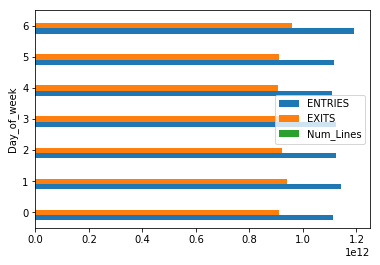

In [28]:
#Your code here
df.DATE = pd.to_datetime(df.DATE)
df['Day_of_week'] = df.DATE.dt.dayofweek
#df['Day_of_week']=df.DATE.dt.day_name().head()
grouped = df.groupby('Day_of_week').sum()
grouped.plot(kind='barh')


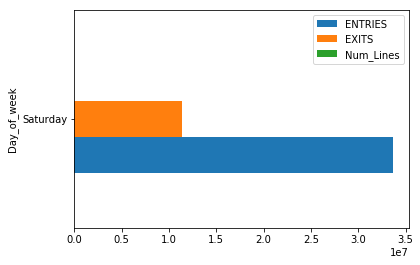

In [91]:
#compare to:
df['Day_of_week']=df.DATE.dt.day_name().head()
day_of_week = df.groupby('Day_of_week').sum()
day_of_week.plot(kind='barh')

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes

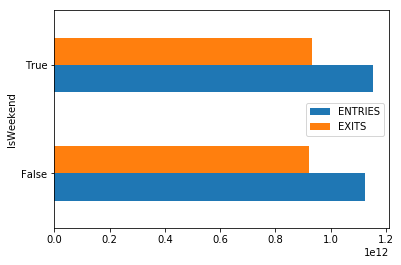

In [30]:
#Your code here
# grouped = grouped.reset_index()
# grouped
# day_of_week['BoolWeekend'] = day_of_week.Dayofweek.map({0:False,1:False,2:False,3:False,4:False,5:True,6:True})
# weekbool = day_of_week.groupby('BoolWeekend').mean()
# weekbool[['ENTRIES', 'EXITS']].plot(kind='barh')

grouped['IsWeekend'] = grouped['Day_of_week'].map({0:False,1:False,2:False,3:False,4:False,5:True,6:True})
wkend = grouped.groupby('IsWeekend').mean()
wkend[['ENTRIES', 'EXITS']].plot(kind='barh')


In [31]:
grouped = grouped.reset_index()
grouped

,index,Day_of_week,ENTRIES,EXITS,Num_Lines,IsWeekend
0,0,0,1114237052454,911938153513,76110,False
1,1,1,1143313287046,942230721477,77303,False
2,2,2,1123655222441,920630864687,75713,False
3,3,3,1122723988662,920691927110,76607,False
4,4,4,1110224700078,906799065337,75573,False
5,5,5,1115661545514,909142081474,74725,True
6,6,6,1192306179082,959223750461,75306,True


## Drop a couple of columns

In [17]:
# Your code here
df = df.drop(['SCP', 'DESC'], axis=1)
df.head()

,LINENAME,C/A,UNIT,STATION,DATE,TIME,ENTRIES,EXITS,Num_Lines,Day_of_week
0,NQR456W,A002,R051,59 ST,2018-08-25,00:00:00,6736067,2283184,7,5
1,NQR456W,A002,R051,59 ST,2018-08-25,04:00:00,6736087,2283188,7,5
2,NQR456W,A002,R051,59 ST,2018-08-25,08:00:00,6736105,2283229,7,5
3,NQR456W,A002,R051,59 ST,2018-08-25,12:00:00,6736180,2283314,7,5
4,NQR456W,A002,R051,59 ST,2018-08-25,16:00:00,6736349,2283384,7,5


## Summary

Great! You practiced your data cleanup-skills using Pandas.